In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: SNP
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


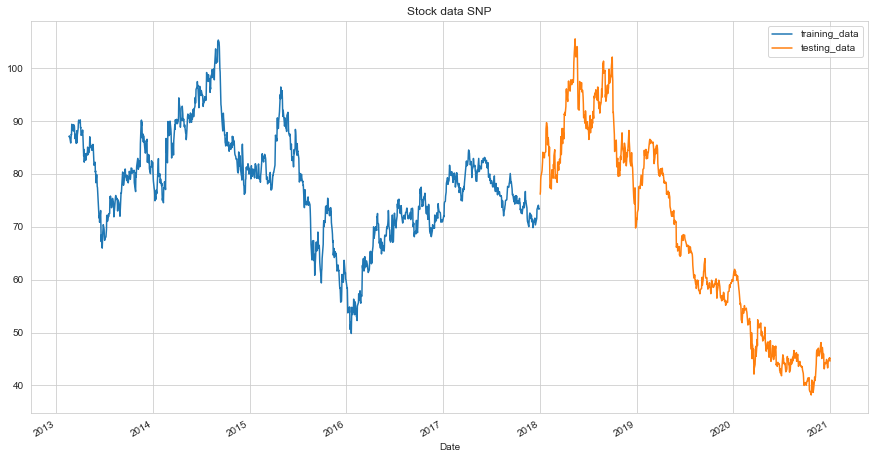

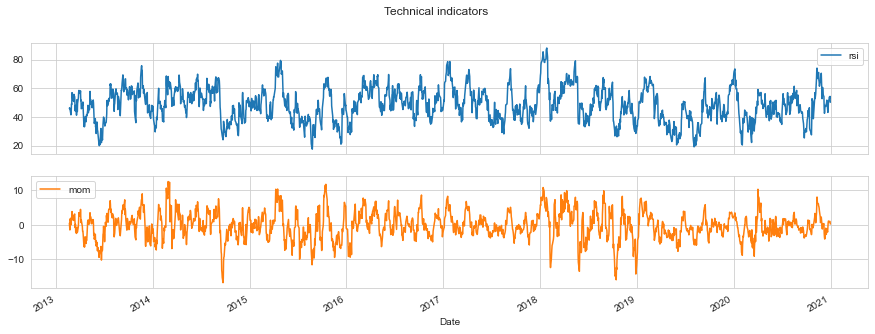

In [10]:
stock_name = 'snp'.upper()
industry = 'Energy'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1086.66, duration: 0:00:00.307069
episode: 2/2000, episode end value: 1042.50, duration: 0:00:00.291067
episode: 3/2000, episode end value: 1058.76, duration: 0:00:00.403098
episode: 4/2000, episode end value: 1047.59, duration: 0:00:00.419091
episode: 5/2000, episode end value: 1082.49, duration: 0:00:00.390088
episode: 6/2000, episode end value: 1053.52, duration: 0:00:00.436678
episode: 7/2000, episode end value: 1106.21, duration: 0:00:00.392096
episode: 8/2000, episode end value: 1062.93, duration: 0:00:00.478107
episode: 9/2000, episode end value: 1095.70, duration: 0:00:00.437101
episode: 10/2000, episode end value: 1117.97, duration: 0:00:00.466479
episode: 11/2000, episode end value: 1104.41, duration: 0:00:00.463644
episode: 12/2000, episode end value: 1219.72, duration: 0:00:00.399090
episode: 13/2000, episode end value: 1076.58, duration: 0:00:00.463103
episode: 14/2000, episode end value: 1093.01, duration: 0:00:00.315072
episode: 15/200

episode: 117/2000, episode end value: 1066.28, duration: 0:00:00.489111
episode: 118/2000, episode end value: 1096.80, duration: 0:00:00.406222
episode: 119/2000, episode end value: 1061.51, duration: 0:00:00.506383
episode: 120/2000, episode end value: 1061.88, duration: 0:00:00.427573
episode: 121/2000, episode end value: 1069.17, duration: 0:00:00.520119
episode: 122/2000, episode end value: 1080.85, duration: 0:00:00.573131
episode: 123/2000, episode end value: 1083.35, duration: 0:00:00.552125
episode: 124/2000, episode end value: 1061.47, duration: 0:00:00.493111
episode: 125/2000, episode end value: 1066.98, duration: 0:00:00.546122
episode: 126/2000, episode end value: 1064.52, duration: 0:00:00.493114
episode: 127/2000, episode end value: 1065.71, duration: 0:00:00.545124
episode: 128/2000, episode end value: 1060.93, duration: 0:00:00.522120
episode: 129/2000, episode end value: 1110.38, duration: 0:00:00.517116
episode: 130/2000, episode end value: 1065.61, duration: 0:00:00

episode: 231/2000, episode end value: 1148.48, duration: 0:00:00.443100
episode: 232/2000, episode end value: 1170.71, duration: 0:00:00.450103
episode: 233/2000, episode end value: 1098.85, duration: 0:00:00.465103
episode: 234/2000, episode end value: 1140.19, duration: 0:00:00.384087
episode: 235/2000, episode end value: 1051.74, duration: 0:00:00.417094
episode: 236/2000, episode end value: 1124.13, duration: 0:00:00.363083
episode: 237/2000, episode end value: 1113.57, duration: 0:00:00.397088
episode: 238/2000, episode end value: 1053.40, duration: 0:00:00.476107
episode: 239/2000, episode end value: 1132.10, duration: 0:00:00.516117
episode: 240/2000, episode end value: 1050.29, duration: 0:00:00.461105
episode: 241/2000, episode end value: 1134.18, duration: 0:00:00.511117
episode: 242/2000, episode end value: 1078.37, duration: 0:00:00.509115
episode: 243/2000, episode end value: 1214.64, duration: 0:00:00.470107
episode: 244/2000, episode end value: 1059.98, duration: 0:00:00

episode: 345/2000, episode end value: 1101.69, duration: 0:00:00.457105
episode: 346/2000, episode end value: 1121.62, duration: 0:00:00.424096
episode: 347/2000, episode end value: 1073.40, duration: 0:00:00.493111
episode: 348/2000, episode end value: 1166.57, duration: 0:00:00.485111
episode: 349/2000, episode end value: 1079.13, duration: 0:00:00.462104
episode: 350/2000, episode end value: 1070.31, duration: 0:00:00.414094
episode: 351/2000, episode end value: 1106.13, duration: 0:00:00.512121
episode: 352/2000, episode end value: 1073.67, duration: 0:00:00.527122
episode: 353/2000, episode end value: 1072.39, duration: 0:00:00.498113
episode: 354/2000, episode end value: 1055.48, duration: 0:00:00.445100
episode: 355/2000, episode end value: 1116.55, duration: 0:00:00.450104
episode: 356/2000, episode end value: 1117.04, duration: 0:00:00.475106
episode: 357/2000, episode end value: 1111.77, duration: 0:00:00.418095
episode: 358/2000, episode end value: 1122.82, duration: 0:00:00

episode: 459/2000, episode end value: 1183.98, duration: 0:00:00.412092
episode: 460/2000, episode end value: 1192.75, duration: 0:00:00.449103
episode: 461/2000, episode end value: 1141.14, duration: 0:00:00.419096
episode: 462/2000, episode end value: 1115.18, duration: 0:00:00.519117
episode: 463/2000, episode end value: 1121.10, duration: 0:00:00.455101
episode: 464/2000, episode end value: 1072.24, duration: 0:00:00.447103
episode: 465/2000, episode end value: 1167.07, duration: 0:00:00.410091
episode: 466/2000, episode end value: 1071.02, duration: 0:00:00.452110
episode: 467/2000, episode end value: 1084.16, duration: 0:00:00.485108
episode: 468/2000, episode end value: 1156.74, duration: 0:00:00.415094
episode: 469/2000, episode end value: 1080.01, duration: 0:00:00.434098
episode: 470/2000, episode end value: 1114.91, duration: 0:00:00.505114
episode: 471/2000, episode end value: 1084.00, duration: 0:00:00.492111
episode: 472/2000, episode end value: 1083.55, duration: 0:00:00

episode: 573/2000, episode end value: 1161.46, duration: 0:00:00.498113
episode: 574/2000, episode end value: 1063.06, duration: 0:00:00.491109
episode: 575/2000, episode end value: 1064.83, duration: 0:00:00.405094
episode: 576/2000, episode end value: 1165.17, duration: 0:00:00.416094
episode: 577/2000, episode end value: 1094.87, duration: 0:00:00.431098
episode: 578/2000, episode end value: 1128.26, duration: 0:00:00.431097
episode: 579/2000, episode end value: 1158.74, duration: 0:00:00.433098
episode: 580/2000, episode end value: 1073.81, duration: 0:00:00.418096
episode: 581/2000, episode end value: 1109.90, duration: 0:00:00.470113
episode: 582/2000, episode end value: 1164.90, duration: 0:00:00.461099
episode: 583/2000, episode end value: 1114.78, duration: 0:00:00.455103
episode: 584/2000, episode end value: 1111.78, duration: 0:00:00.411090
episode: 585/2000, episode end value: 1080.97, duration: 0:00:00.421095
episode: 586/2000, episode end value: 1119.64, duration: 0:00:00

episode: 687/2000, episode end value: 1114.74, duration: 0:00:00.438102
episode: 688/2000, episode end value: 1117.81, duration: 0:00:00.459100
episode: 689/2000, episode end value: 1116.84, duration: 0:00:00.428098
episode: 690/2000, episode end value: 1058.57, duration: 0:00:00.418094
episode: 691/2000, episode end value: 1056.42, duration: 0:00:00.391082
episode: 692/2000, episode end value: 1072.14, duration: 0:00:00.427097
episode: 693/2000, episode end value: 1129.10, duration: 0:00:00.431098
episode: 694/2000, episode end value: 1089.03, duration: 0:00:00.425098
episode: 695/2000, episode end value: 1078.30, duration: 0:00:00.418092
episode: 696/2000, episode end value: 1113.25, duration: 0:00:00.457103
episode: 697/2000, episode end value: 1029.81, duration: 0:00:00.411093
episode: 698/2000, episode end value: 1089.71, duration: 0:00:00.479108
episode: 699/2000, episode end value: 1116.14, duration: 0:00:00.495111
episode: 700/2000, episode end value: 1113.06, duration: 0:00:00

episode: 801/2000, episode end value: 1108.34, duration: 0:00:00.436096
episode: 802/2000, episode end value: 1080.55, duration: 0:00:00.306066
episode: 803/2000, episode end value: 1047.79, duration: 0:00:00.448101
episode: 804/2000, episode end value: 1115.52, duration: 0:00:00.494110
episode: 805/2000, episode end value: 1148.06, duration: 0:00:00.498114
episode: 806/2000, episode end value: 1108.46, duration: 0:00:00.470109
episode: 807/2000, episode end value: 1074.64, duration: 0:00:00.462103
episode: 808/2000, episode end value: 1133.80, duration: 0:00:00.418094
episode: 809/2000, episode end value: 1194.50, duration: 0:00:00.390088
episode: 810/2000, episode end value: 1164.73, duration: 0:00:00.453102
episode: 811/2000, episode end value: 1123.19, duration: 0:00:00.454104
episode: 812/2000, episode end value: 1115.44, duration: 0:00:00.483108
episode: 813/2000, episode end value: 1056.79, duration: 0:00:00.335081
episode: 814/2000, episode end value: 1092.59, duration: 0:00:00

episode: 915/2000, episode end value: 1087.19, duration: 0:00:00.455104
episode: 916/2000, episode end value: 1170.72, duration: 0:00:00.399091
episode: 917/2000, episode end value: 1065.23, duration: 0:00:00.492112
episode: 918/2000, episode end value: 1132.97, duration: 0:00:00.443104
episode: 919/2000, episode end value: 1074.93, duration: 0:00:00.434095
episode: 920/2000, episode end value: 1106.32, duration: 0:00:00.438099
episode: 921/2000, episode end value: 1114.37, duration: 0:00:00.379084
episode: 922/2000, episode end value: 1101.57, duration: 0:00:00.437105
episode: 923/2000, episode end value: 1104.21, duration: 0:00:00.499111
episode: 924/2000, episode end value: 1145.75, duration: 0:00:00.437099
episode: 925/2000, episode end value: 1146.79, duration: 0:00:00.453102
episode: 926/2000, episode end value: 1081.45, duration: 0:00:00.464104
episode: 927/2000, episode end value: 1138.59, duration: 0:00:00.429096
episode: 928/2000, episode end value: 1074.28, duration: 0:00:00

episode: 1029/2000, episode end value: 1119.99, duration: 0:00:00.486110
episode: 1030/2000, episode end value: 1069.61, duration: 0:00:00.428096
episode: 1031/2000, episode end value: 1118.29, duration: 0:00:00.437099
episode: 1032/2000, episode end value: 1151.45, duration: 0:00:00.388093
episode: 1033/2000, episode end value: 1116.79, duration: 0:00:00.471108
episode: 1034/2000, episode end value: 1090.13, duration: 0:00:00.487109
episode: 1035/2000, episode end value: 1108.18, duration: 0:00:00.446102
episode: 1036/2000, episode end value: 1065.06, duration: 0:00:00.455105
episode: 1037/2000, episode end value: 1123.40, duration: 0:00:00.452101
episode: 1038/2000, episode end value: 1085.61, duration: 0:00:00.470111
episode: 1039/2000, episode end value: 1081.29, duration: 0:00:00.465106
episode: 1040/2000, episode end value: 1127.73, duration: 0:00:00.457104
episode: 1041/2000, episode end value: 1081.29, duration: 0:00:00.487110
episode: 1042/2000, episode end value: 1119.08, dur

episode: 1142/2000, episode end value: 1087.76, duration: 0:00:00.424094
episode: 1143/2000, episode end value: 1083.82, duration: 0:00:00.456073
episode: 1144/2000, episode end value: 1091.93, duration: 0:00:00.425115
episode: 1145/2000, episode end value: 1115.18, duration: 0:00:00.473105
episode: 1146/2000, episode end value: 1089.93, duration: 0:00:00.398093
episode: 1147/2000, episode end value: 1139.45, duration: 0:00:00.419093
episode: 1148/2000, episode end value: 1134.18, duration: 0:00:00.356080
episode: 1149/2000, episode end value: 1130.81, duration: 0:00:00.420096
episode: 1150/2000, episode end value: 1131.33, duration: 0:00:00.444494
episode: 1151/2000, episode end value: 1141.33, duration: 0:00:00.340079
episode: 1152/2000, episode end value: 1073.28, duration: 0:00:00.423096
episode: 1153/2000, episode end value: 1054.04, duration: 0:00:00.399088
episode: 1154/2000, episode end value: 1112.48, duration: 0:00:00.437098
episode: 1155/2000, episode end value: 1193.95, dur

episode: 1255/2000, episode end value: 1093.06, duration: 0:00:00.434098
episode: 1256/2000, episode end value: 1128.66, duration: 0:00:00.408740
episode: 1257/2000, episode end value: 1113.67, duration: 0:00:00.464189
episode: 1258/2000, episode end value: 1119.03, duration: 0:00:00.452103
episode: 1259/2000, episode end value: 1114.35, duration: 0:00:00.485110
episode: 1260/2000, episode end value: 1094.88, duration: 0:00:00.448099
episode: 1261/2000, episode end value: 1133.23, duration: 0:00:00.428096
episode: 1262/2000, episode end value: 1084.94, duration: 0:00:00.387083
episode: 1263/2000, episode end value: 1158.14, duration: 0:00:00.453103
episode: 1264/2000, episode end value: 1128.03, duration: 0:00:00.481048
episode: 1265/2000, episode end value: 1128.98, duration: 0:00:00.458104
episode: 1266/2000, episode end value: 1096.63, duration: 0:00:00.466105
episode: 1267/2000, episode end value: 1214.87, duration: 0:00:00.416094
episode: 1268/2000, episode end value: 1201.91, dur

episode: 1368/2000, episode end value: 1076.68, duration: 0:00:00.384100
episode: 1369/2000, episode end value: 1103.91, duration: 0:00:00.375854
episode: 1370/2000, episode end value: 1077.39, duration: 0:00:00.376087
episode: 1371/2000, episode end value: 1129.76, duration: 0:00:00.402090
episode: 1372/2000, episode end value: 1079.78, duration: 0:00:00.396088
episode: 1373/2000, episode end value: 1090.35, duration: 0:00:00.379088
episode: 1374/2000, episode end value: 1073.77, duration: 0:00:00.347079
episode: 1375/2000, episode end value: 1061.09, duration: 0:00:00.381592
episode: 1376/2000, episode end value: 1106.03, duration: 0:00:00.395137
episode: 1377/2000, episode end value: 1120.73, duration: 0:00:00.389085
episode: 1378/2000, episode end value: 1092.86, duration: 0:00:00.411091
episode: 1379/2000, episode end value: 1086.19, duration: 0:00:00.410090
episode: 1380/2000, episode end value: 1064.44, duration: 0:00:00.456101
episode: 1381/2000, episode end value: 1066.56, dur

episode: 1481/2000, episode end value: 1038.31, duration: 0:00:00.230050
episode: 1482/2000, episode end value: 1110.52, duration: 0:00:00.362081
episode: 1483/2000, episode end value: 1084.74, duration: 0:00:00.329074
episode: 1484/2000, episode end value: 1106.06, duration: 0:00:00.306071
episode: 1485/2000, episode end value: 1104.36, duration: 0:00:00.316071
episode: 1486/2000, episode end value: 1118.70, duration: 0:00:00.338076
episode: 1487/2000, episode end value: 1048.36, duration: 0:00:00.280066
episode: 1488/2000, episode end value: 1155.08, duration: 0:00:00.322072
episode: 1489/2000, episode end value: 1059.28, duration: 0:00:00.313074
episode: 1490/2000, episode end value: 1125.78, duration: 0:00:00.324069
episode: 1491/2000, episode end value: 1086.62, duration: 0:00:00.324070
episode: 1492/2000, episode end value: 1094.70, duration: 0:00:00.314075
episode: 1493/2000, episode end value: 1094.71, duration: 0:00:00.359077
episode: 1494/2000, episode end value: 1109.24, dur

episode: 1594/2000, episode end value: 1116.01, duration: 0:00:00.337082
episode: 1595/2000, episode end value: 1123.44, duration: 0:00:00.374084
episode: 1596/2000, episode end value: 1123.62, duration: 0:00:00.376085
episode: 1597/2000, episode end value: 1143.02, duration: 0:00:00.351082
episode: 1598/2000, episode end value: 1136.31, duration: 0:00:00.345076
episode: 1599/2000, episode end value: 1065.54, duration: 0:00:00.373434
episode: 1600/2000, episode end value: 1135.34, duration: 0:00:00.314764
episode: 1601/2000, episode end value: 1123.62, duration: 0:00:00.359080
episode: 1602/2000, episode end value: 1080.24, duration: 0:00:00.323073
episode: 1603/2000, episode end value: 1114.76, duration: 0:00:00.267060
episode: 1604/2000, episode end value: 1123.15, duration: 0:00:00.322075
episode: 1605/2000, episode end value: 1074.88, duration: 0:00:00.291065
episode: 1606/2000, episode end value: 1086.73, duration: 0:00:00.267060
episode: 1607/2000, episode end value: 1142.34, dur

episode: 1707/2000, episode end value: 1085.83, duration: 0:00:00.285064
episode: 1708/2000, episode end value: 1082.47, duration: 0:00:00.284064
episode: 1709/2000, episode end value: 1084.35, duration: 0:00:00.272058
episode: 1710/2000, episode end value: 1139.48, duration: 0:00:00.314073
episode: 1711/2000, episode end value: 1126.04, duration: 0:00:00.311069
episode: 1712/2000, episode end value: 1146.62, duration: 0:00:00.258059
episode: 1713/2000, episode end value: 1130.01, duration: 0:00:00.292066
episode: 1714/2000, episode end value: 1113.86, duration: 0:00:00.327072
episode: 1715/2000, episode end value: 1045.45, duration: 0:00:00.308068
episode: 1716/2000, episode end value: 1129.91, duration: 0:00:00.307071
episode: 1717/2000, episode end value: 1068.09, duration: 0:00:00.289072
episode: 1718/2000, episode end value: 1133.22, duration: 0:00:00.267058
episode: 1719/2000, episode end value: 1064.25, duration: 0:00:00.265058
episode: 1720/2000, episode end value: 1120.62, dur

episode: 1820/2000, episode end value: 1099.57, duration: 0:00:00.280063
episode: 1821/2000, episode end value: 1076.11, duration: 0:00:00.296145
episode: 1822/2000, episode end value: 1090.20, duration: 0:00:00.272071
episode: 1823/2000, episode end value: 1060.22, duration: 0:00:00.292331
episode: 1824/2000, episode end value: 1061.07, duration: 0:00:00.270072
episode: 1825/2000, episode end value: 1067.29, duration: 0:00:00.283501
episode: 1826/2000, episode end value: 1060.19, duration: 0:00:00.286945
episode: 1827/2000, episode end value: 1067.05, duration: 0:00:00.286413
episode: 1828/2000, episode end value: 1078.14, duration: 0:00:00.295065
episode: 1829/2000, episode end value: 1135.95, duration: 0:00:00.282062
episode: 1830/2000, episode end value: 1064.64, duration: 0:00:00.291065
episode: 1831/2000, episode end value: 1141.21, duration: 0:00:00.317074
episode: 1832/2000, episode end value: 1068.99, duration: 0:00:00.263059
episode: 1833/2000, episode end value: 1110.26, dur

episode: 1934/2000, episode end value: 1109.00, duration: 0:00:00.220041
episode: 1935/2000, episode end value: 1080.96, duration: 0:00:00.214048
episode: 1936/2000, episode end value: 1104.32, duration: 0:00:00.213047
episode: 1937/2000, episode end value: 1108.93, duration: 0:00:00.242053
episode: 1938/2000, episode end value: 1123.47, duration: 0:00:00.211275
episode: 1939/2000, episode end value: 1148.03, duration: 0:00:00.218326
episode: 1940/2000, episode end value: 1084.92, duration: 0:00:00.225110
episode: 1941/2000, episode end value: 1060.78, duration: 0:00:00.227913
episode: 1942/2000, episode end value: 1079.92, duration: 0:00:00.235053
episode: 1943/2000, episode end value: 1054.85, duration: 0:00:00.216050
episode: 1944/2000, episode end value: 1086.76, duration: 0:00:00.216048
episode: 1945/2000, episode end value: 1138.39, duration: 0:00:00.216047
episode: 1946/2000, episode end value: 1120.81, duration: 0:00:00.226072
episode: 1947/2000, episode end value: 1117.59, dur

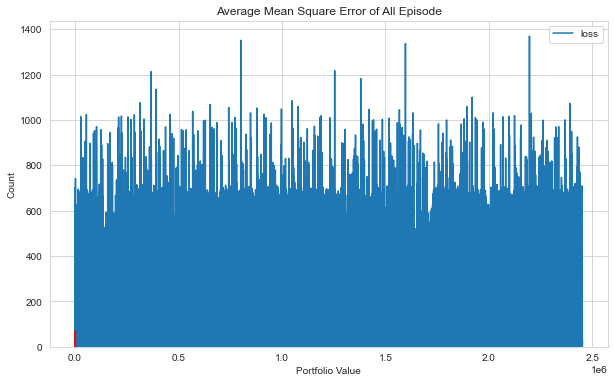

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

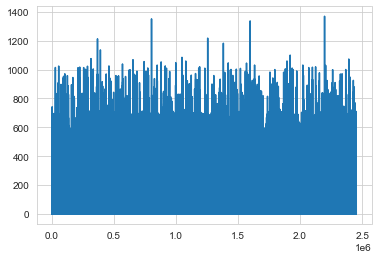

In [5]:
plt.plot(agent.model.losses)

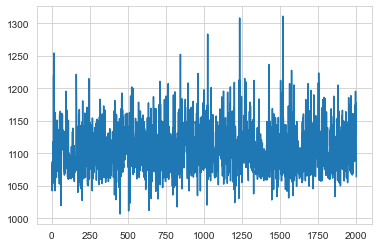

In [6]:
plt.plot(portfolio_value)

episode end value: 797.22, duration: 0:00:00.082018
Sell: 253 times, Buy: 253 times


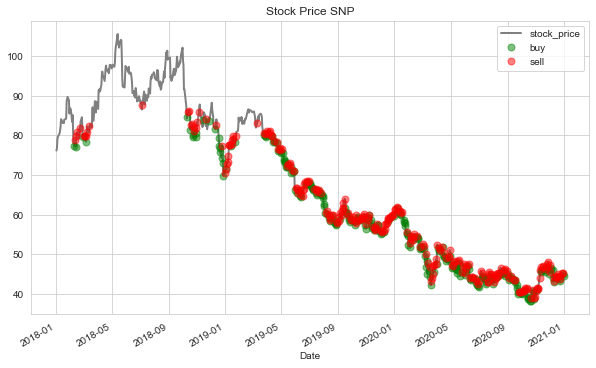

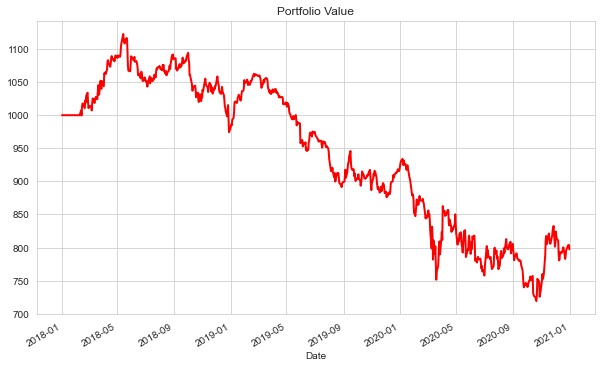

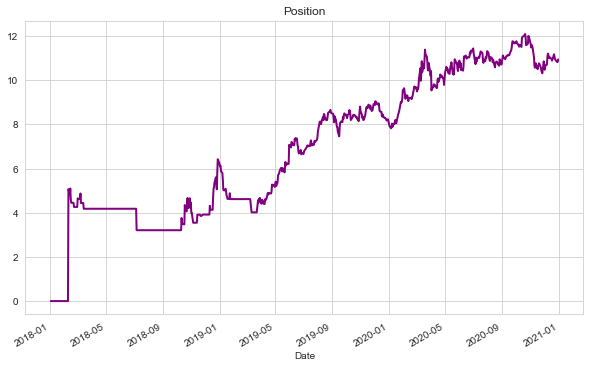

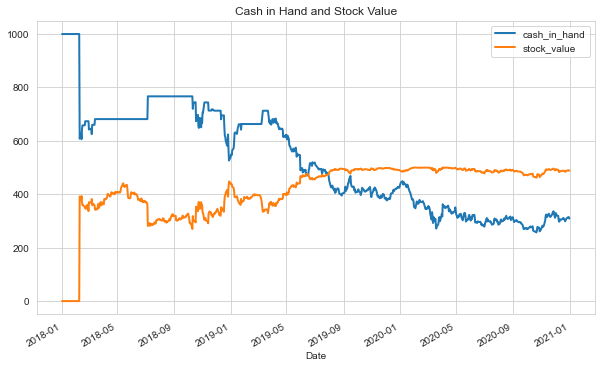

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: SNP
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: -7.28 %
Volatility: 0.1528
shape ratio: -0.5482
Maximun drawdown: -35.94 %
Calmar ratio: -0.2024
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -16.33 %
Volatility (benchmark): 0.3053
shape ratio: -0.5709
Maximun drawdown: -63.79 %
Calmar ratio (benchmark): -0.2560


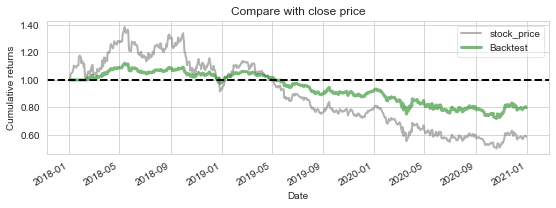

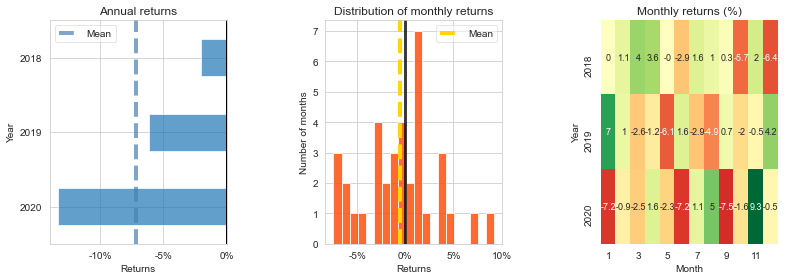

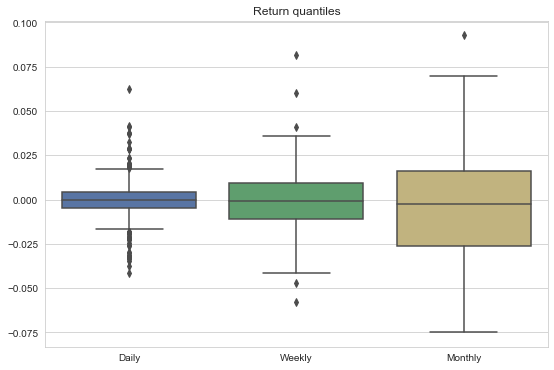

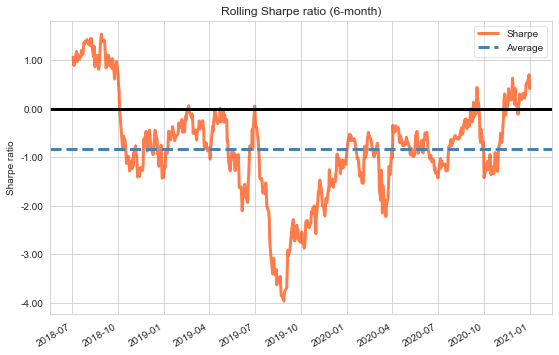

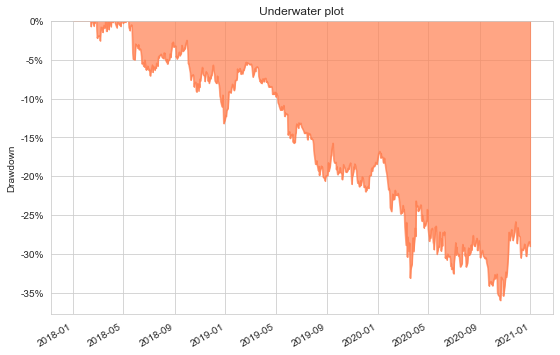

In [11]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')